### Import data

In [13]:
%matplotlib inline
from azureml import Workspace
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ws = Workspace()

csv_files = ['Commodity.csv', 'Currency.csv', 'Economic_Indicator.csv',
             'Equity.csv', 'Index.csv', 'Precious_Metal.csv']
names = []
instruments = {}
for file in csv_files:
    name = file[0:3].lower()
    names.append(name)
    instruments[name] = ws.datasets[file].to_dataframe()
print(names)

['com', 'cur', 'eco', 'equ', 'ind', 'pre']


Check number of tickers and missing value for each file

In [28]:
from collections import Counter

tickers = {}
for key, instrument in instruments.items():
    tickers[key] = Counter(instrument['Ticker'])
    print(key + ' -> ' + str(len(tickers[key])) +  ' -> ', end='')
    print(instrument.columns.values)

pre -> 17 -> ['Ticker' 'Date' 'Close' 'Unnamed: 3']
ind -> 23 -> ['Ticker' 'Date' 'Open' 'High' 'Low' 'Close']
eco -> 602 -> ['Ticker' 'Date' 'Value' 'Unnamed: 3']
equ -> 2130 -> ['Ticker' 'Date' 'Open' 'High' 'Low' 'Close' 'Volume' 'MarketCap']
com -> 15 -> ['Ticker' 'Date' 'Open' 'High' 'Low' 'Close']
cur -> 46 -> ['Ticker' 'Date' 'Open' 'High' 'Low' 'Close']


### Currency

In [144]:
def f1(instruments = None, master = None):

    # Execution logic goes here
    # Split by ticker
    dict_instruments = {}
    for ticker in master.Ticker:
        instrument = instruments.loc[instruments.Ticker == ticker]
        instrument = instrument.set_index('Date')
        instrument['LogReturn'] = np.log(instrument.Close) - np.log(instrument.Close.shift(1))
        dict_instruments[ticker] = instrument[['LogReturn']]
    # Concat into a DataFrame
    instrument_keys = list(dict_instruments.keys())
    print(instrument_keys)
    instruments_out = pd.concat([dict_instruments[key].rename(columns={'LogReturn': key}) for key in instrument_keys], axis=1)
    
    # Return value must be of a sequence of pandas.DataFrame
    return instruments_out,

In [146]:
instrument = instruments['cur']
master = ws.datasets['Currency_Master.csv'].to_dataframe()




instruments_out = f1(instrument, master)

instruments_out

['USDGBP Curncy', 'USDCNY Curncy', 'USDHUF Curncy', 'USDEUR Curncy', 'USDTWD Curncy', 'USDNZD Curncy', 'USDAED Curncy', 'USDBHD Curncy', 'USDEGP Curncy', 'USDAUD Curncy', 'USDZAR Curncy', 'USDJOD Curncy', 'USDCLP Curncy', 'USDVND Curncy', 'USDMYR Curncy', 'USDKES Curncy', 'USDCOP Curncy', 'USDCZK Curncy', 'USDIDR Curncy', 'USDQAR Curncy', 'USDMXN Curncy', 'USDMAD Curncy', 'USDCHF Curncy', 'USDOMR Curncy', 'USDVEF Curncy', 'USDCAD Curncy', 'USDRUB Curncy', 'USDSEK Curncy', 'USDPLN Curncy', 'USDUGX Curncy', 'USDBRL Curncy', 'USDPHP Curncy', 'USDTRY Curncy', 'USDNGN Curncy', 'USDJPY Curncy', 'USDSGD Curncy', 'USDARS Curncy', 'USDILS Curncy', 'USDUAH Curncy', 'USDDKK Curncy', 'USDSAR Curncy', 'USDTHB Curncy', 'USDPKR Curncy', 'USDKRW Curncy', 'USDNOK Curncy', 'USDHKD Curncy']


(            USDGBP Curncy  USDCNY Curncy  USDHUF Curncy  USDEUR Curncy  \
 2007-01-01            NaN            NaN            NaN            NaN   
 2007-01-02      -0.007276      -0.001396      -0.005156      -0.005427   
 2007-01-03       0.011186       0.000000       0.011017       0.007801   
 2007-01-04       0.004479       0.000051       0.011980       0.006563   
 2007-01-05       0.006970      -0.000102       0.009237       0.006261   
 2007-01-08      -0.004447       0.001229      -0.006971      -0.001692   
 2007-01-09      -0.000969      -0.001101       0.007992       0.001822   
 2007-01-10       0.004065       0.000154       0.008333       0.004799   
 2007-01-11      -0.006785      -0.001577      -0.002635       0.003487   
 2007-01-12      -0.007223       0.000334      -0.007742      -0.002323   
 2007-01-15      -0.002747      -0.000539      -0.003688      -0.001164   
 2007-01-16       0.001570      -0.000449       0.007261       0.001551   
 2007-01-17      -0.00412

In [135]:
name = 'equ'
# Split by ticker
dfcurrency = instruments[name]
currency = {}
for key in tickers[name]:
    ticker = key.split()[0]
    curr = dfcurrency.loc[dfcurrency['Ticker'] == key]
    curr = curr.set_index('Date')
    curr['LogReturn'] = np.log(curr.Close) - np.log(curr.Close.shift(1))
    currency[ticker] = curr[['LogReturn']]

In [139]:
# Concat into a DataFrame
cur_keys = list(currency.keys())
currency_final = pd.concat([currency[key].rename(columns={'LogReturn': key}) for key in cur_keys], axis=1)

currency_final

# C = currency_final.corr()
# plt.matshow(C, cmap=plt.cm.bwr)

,BHI,SSNC,SNPS,PPG,URI,7936,CTX,MEDAA,TRYG,SN/,...,IAU,8802,SNGS,KSS,SDF,OGDC,ALLY,SHF,TXN,1055
2007-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.016373,-0.013145,0.009081,0.007397,...,NaN,NaN,NaN,NaN,-0.015092,NaN,NaN,NaN,NaN,0.000000
2007-01-04,-0.046081,NaN,0.015359,-0.000310,-0.016748,NaN,0.005631,-0.044452,0.002257,0.002760,...,-0.008058,NaN,NaN,0.008905,-0.028356,-0.004792,NaN,NaN,0.018731,-0.005981
2007-01-05,-0.007497,NaN,-0.013473,0.003250,-0.017033,-0.023225,-0.014357,0.017631,-0.006787,-0.009229,...,-0.026065,-0.019418,NaN,-0.013088,-0.031733,-0.011419,NaN,NaN,-0.011753,0.045114
2007-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-08,0.005885,NaN,0.009376,-0.006665,-0.008828,NaN,-0.011016,0.007737,-0.001136,-0.010252,...,0.005466,NaN,NaN,-0.008268,-0.015773,0.014035,NaN,NaN,0.004856,-0.039132
2007-01-09,0.002198,NaN,-0.005990,0.013900,0.006028,0.000000,0.020610,0.005764,0.060625,0.007001,...,0.006585,0.025808,NaN,0.006020,0.017603,0.034250,NaN,NaN,-0.002078,0.056623
2007-01-10,-0.021452,NaN,0.010460,0.001379,0.007981,-0.013918,-0.004350,-0.001917,-0.024907,-0.002795,...,-0.003946,-0.019293,-0.004474,0.014449,-0.029398,-0.008878,NaN,NaN,0.016848,-0.017491
2007-01-11,-0.008561,NaN,0.001485,0.017310,0.005944,0.012535,-0.001309,-0.001798,0.030240,0.016652,...,0.000823,-0.013072,0.008847,0.006780,0.018090,-0.005535,NaN,NaN,-0.010281,0.062413


[('BHI', 'SPY', 0.67342439286852906),
 ('BHI', 'IWD', 0.67246179844742626),
 ('BHI', 'NBL', 0.70468310960825853),
 ('BHI', 'CAM', 0.72786799044460326),
 ('BHI', 'SLB', 0.76570443452858616),
 ('BHI', 'XEC', 0.67578239657050476),
 ('BHI', 'VTI', 0.68087231369911894),
 ('BHI', 'COP', 0.69542048598033235),
 ('BHI', 'IWF', 0.6721740207296375),
 ('BHI', 'EFA', 0.6577334092746171),
 ('BHI', 'VEA', 0.67030152901767559),
 ('BHI', 'HES', 0.68706023901615987),
 ('BHI', 'RSP', 0.67459299385145399),
 ('BHI', 'XIU', 0.65172948554911625),
 ('BHI', 'IWB', 0.67971966890805569),
 ('BHI', 'IVW', 0.67279239794316659),
 ('BHI', 'VTV', 0.66181391299449721),
 ('BHI', 'DVN', 0.68209842523300945),
 ('BHI', 'PXD', 0.6912372392845707),
 ('BHI', 'NFX', 0.66309955103778917),
 ('BHI', 'WFT', 0.70768210237680018),
 ('BHI', 'IWP', 0.66969725970427141),
 ('BHI', 'APA', 0.70441984399647539),
 ('BHI', 'APC', 0.68059702098061148),
 ('BHI', 'IWS', 0.66131555884592141),
 ('BHI', 'IJK', 0.66443793942759821),
 ('BHI', 'MRO',

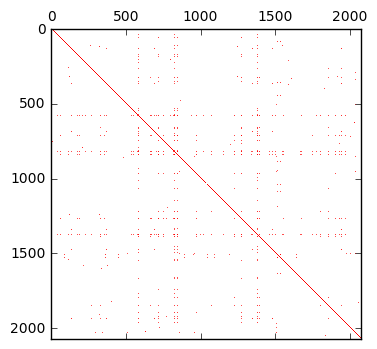

In [138]:
threshold = 0.65
Ct = C[abs(C) > threshold]
plt.matshow(Ct, cmap=plt.cm.bwr)
corr_curr = []
for index, row in Ct.iterrows():
    row = row[row.notnull()]
    for key, value in row.iteritems():
        if row.name != key:
            corr_curr.append((row.name, key, value))
len(corr_curr)
corr_curr